In [1]:
import os
print(os.listdir())


['.anaconda', '.android', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.VirtualBox', '.vscode', '.zenmap', 'anaconda3', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Favorites', 'Housing.csv', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TM.blf', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{62a2397a-f76c-11ef-acc4-9ee242725eec}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searches', 'SendTo', 'skewness_report.csv', 'Smartphones_cleaned_dataset.csv', 'Start Menu', 'Task 1.ipynb', 'task.ipynb', 'task1..ipynb', 'task2.ipynb', 'Templates', 'Titanic-Dataset.csv', 'Titanic-Dataset.csv.csv', 'Titanic_Cleaned.csv', 'Untitled.ipynb', 'Unti

In [2]:
import pandas as pd
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [10]:
df = pd.read_csv("housing.csv") 
print("Columns:", df.columns.tolist())
target = 'price'
X = df.drop(columns=[target])
y = df[target]
X = X.fillna(X.select_dtypes(include='number').mean())
X = pd.get_dummies(X, drop_first=True)



Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [13]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.3f}")


Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R-squared (R²): 0.653


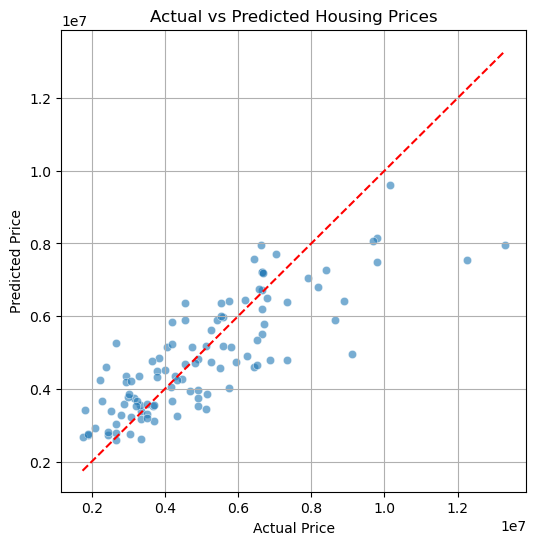

In [14]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.show()


In [15]:

coef_df = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("Top 10 Positive Influences:\n", coef_df.head(10))
print("\nTop 10 Negative Influences:\n", coef_df.tail(10))


Top 10 Positive Influences:
 bathrooms              1.094445e+06
airconditioning_yes    7.914267e+05
hotwaterheating_yes    6.846499e+05
prefarea_yes           6.298906e+05
stories                4.074766e+05
basement_yes           3.902512e+05
mainroad_yes           3.679199e+05
guestroom_yes          2.316100e+05
parking                2.248419e+05
bedrooms               7.677870e+04
dtype: float64

Top 10 Negative Influences:
 prefarea_yes                       629890.565313
stories                            407476.594985
basement_yes                       390251.176181
mainroad_yes                       367919.947680
guestroom_yes                      231610.037176
parking                            224841.913277
bedrooms                            76778.701634
area                                  235.968805
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64
